In [199]:
import psycopg2
import pandas as pd 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import datetime

In [16]:
conn = psycopg2.connect("user='postgres' host='localhost'")

cur = conn.cursor()

conn.autocommit = True
cur.execute('DROP DATABASE IF EXISTS insulinpricing;')
cur.execute('CREATE DATABASE insulinpricing;')

In [17]:
cur.close() # This is optional
conn.close() # Closing the connection also closes all cursors

In [28]:
conn = psycopg2.connect("dbname='insulinpricing' user='postgres' host='localhost'")

cur = conn.cursor()

In [19]:
 # Inside insulinpricing database create a table with all of the 
    #appropriate column names to match with the CSV file header. '
query = '''
       
CREATE TABLE nadacpricing(NDC_Description VARCHAR ,NDC VARCHAR, 
    NADAC_Per_Unit NUMERIC, Effective_Date DATE,
    Pricing_Unit VARCHAR,Pharmacy_Type_Indicator VARCHAR,
    OTC VARCHAR,Explanation_Code VARCHAR,
    Classification_for_Rate_Setting VARCHAR,
    Corresponding_Generic_Drug_NADAC_Per_Unit NUMERIC,
    Corresponding_Generic_Drug_Effective_Date DATE,
    As_of_Date DATE);
        '''
cur.execute(query)

In [22]:
!for x in $(ls /Users/GuntherUlvanget/Dropbox/NADAC_downloads/NADAC/NADAC*.csv); do psql -c "COPY nadacpricing FROM '$x' CSV HEADER;" insulinpricing; done


COPY 22101
COPY 22488
COPY 22994
COPY 23214
COPY 23576
COPY 23144
COPY 23400
COPY 23742
COPY 23791
COPY 23816
COPY 23894
COPY 24238
COPY 24562
COPY 24522
COPY 24558
COPY 24602
COPY 25138
COPY 24957
COPY 24904
COPY 24796
COPY 25007
COPY 24810
COPY 24796
COPY 25129
COPY 24880


In [ ]:
cur.execute(query)

In [174]:
query = '''
Select NDC_Description,NDC, NADAC_Per_Unit, 
As_of_Date DATE,Effective_Date DATE 
from nadacpricing                                                                                      WHERE NDC_Description like 'HUMA%'                                                                                                                                                         
OR NDC_Description like 'HUMU%'
or NDC_Description like 'TRESI%' 
or NDC_Description like 'LEVEM%'                                                                                                                                                    
or NDC_description like 'LANTU%'
or NDC_description like 'TOUJ%'       
or NDC_description like 'NOVOL%'   
or NDC_Description like 'FIAS%'  
or NDC_Description like 'APID%'
or NDC_Description like 'NOVOL%'
or NDC_DESCRIPTION like 'BASAG%'
                    ;

'''
cur.execute(query)


In [175]:

cur.fetchone()

('LANTUS SOLOSTAR 100 UNITS/ML',
 '00088221905',
 Decimal('24.0596'),
 datetime.date(2015, 6, 24),
 datetime.date(2014, 11, 7))

In [176]:
results = cur.fetchall()

In [177]:
len(results)

912

In [196]:
df = pd.DataFrame(results, columns =['Description', "NDC",'Price_unit', 'As of date','Effective date']) 
df.sort_values(by=["Description","As of date"], inplace = True) 
df.head()
df['Price_unit'] = df['Price_unit'].apply(pd.to_numeric)
df['Description'] = df['Description'].apply(str)
data = df[df['Description'].str.contains('NOVOLO', regex=True)]
df.head(50)

,Description,NDC,Price_unit,As of date,Effective date
718,APIDRA 100 UNITS/ML VIAL,00088250033,15.23692,2013-12-25,2013-12-13
743,APIDRA 100 UNITS/ML VIAL,00088250033,15.18298,2014-03-26,2014-02-19
786,APIDRA 100 UNITS/ML VIAL,00088250033,15.18298,2014-06-25,2014-02-19
806,APIDRA 100 UNITS/ML VIAL,00088250033,17.90362,2014-09-24,2014-06-27
846,APIDRA 100 UNITS/ML VIAL,00088250033,17.90362,2014-12-31,2014-06-27
854,APIDRA 100 UNITS/ML VIAL,00088250033,19.69738,2015-03-25,2015-03-18
897,APIDRA 100 UNITS/ML VIAL,00088250033,21.64722,2015-06-24,2015-06-12
31,APIDRA 100 UNITS/ML VIAL,00088250033,21.75123,2015-09-30,2015-08-19
74,APIDRA 100 UNITS/ML VIAL,00088250033,21.75123,2015-12-30,2015-08-19
99,APIDRA 100 UNITS/ML VIAL,00088250033,22.90885,2016-03-30,2016-03-23


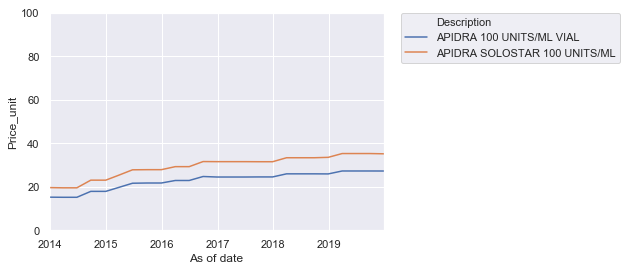

In [209]:

fig, axs = plt.subplots(1,1)
ax.set(ylim=(10, 100))
sns.lineplot(x = "As of date", y='Price_unit', 
          hue="Description", 
          data=df[df['Description'].str.contains('APID', regex=True)], 
          dashes = False
         )
plt.xlim(datetime.date(2013,12,25)	,datetime.date(2019,12,25))
plt.ylim(0,100) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

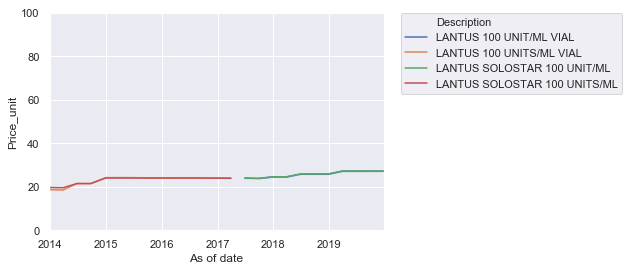

In [210]:
sns.lineplot(x = "As of date", y='Price_unit', 
                  hue="Description", 
                  data=df[df['Description'].str.contains('LAN', regex=True)], 
                  dashes = False
                 )
plt.xlim(datetime.date(2013,12,25)	,datetime.date(2019,12,25))
plt.ylim(0,100) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

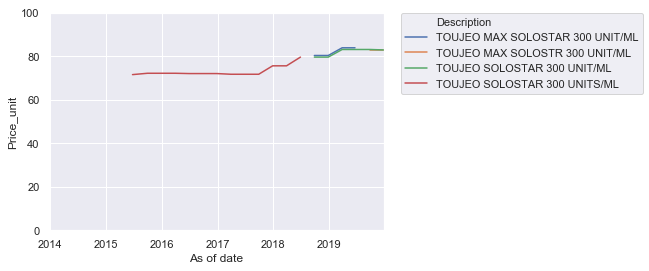

In [216]:
#HUMU
sns.lineplot(x = "As of date", y='Price_unit', 
                  hue="Description", 
                  data=df[df['Description'].str.contains('TOUJ', regex=True)], 
                  dashes = False
                 )
plt.xlim(datetime.date(2013,12,25)	,datetime.date(2019,12,25))
plt.ylim(0,100) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

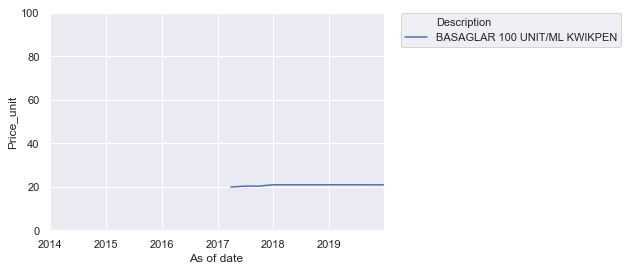

In [217]:
sns.lineplot(x = "As of date", y='Price_unit', 
                  hue="Description", 
                  data=df[df['Description'].str.contains('BAS', regex=True)], 
                  dashes = False
                 )
plt.xlim(datetime.date(2013,12,25)	,datetime.date(2019,12,25))
plt.ylim(0,100) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

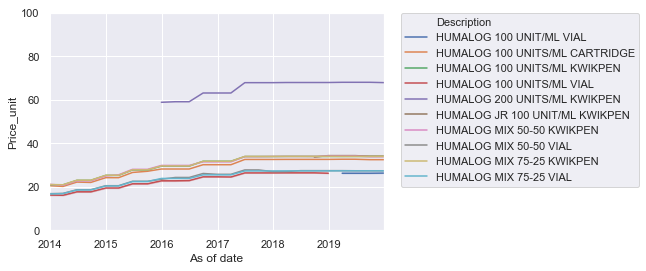

In [221]:
sns.lineplot(x = "As of date", y='Price_unit', 
                  hue="Description", 
                  data=df[df['Description'].str.contains('HUMA', regex=True)], 
                  dashes = False
                 )
plt.xlim(datetime.date(2013,12,25)	,datetime.date(2019,12,25))
plt.ylim(0,100) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

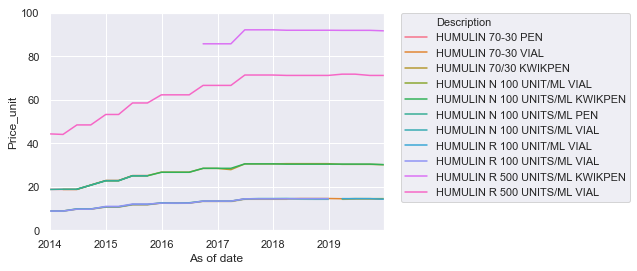

In [222]:
sns.lineplot(x = "As of date", y='Price_unit', 
                  hue="Description", 
                  data=df[df['Description'].str.contains('HUMU', regex=True)], 
                  dashes = False
                 )
plt.xlim(datetime.date(2013,12,25)	,datetime.date(2019,12,25))
plt.ylim(0,100) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

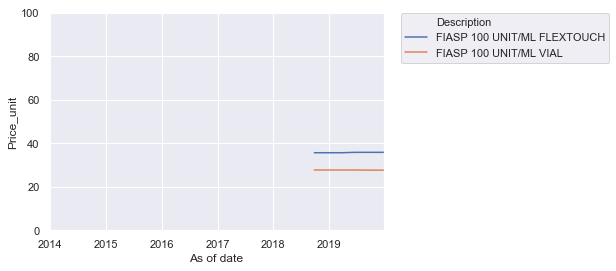

In [208]:
sns.lineplot(x = "As of date", y='Price_unit', 
                  hue="Description", 
                  data=df[df['Description'].str.contains('FIAS', regex=True)], 
                  dashes = False
                 )
plt.xlim(datetime.date(2013,12,25)	,datetime.date(2019,12,25))
plt.ylim(0,100) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

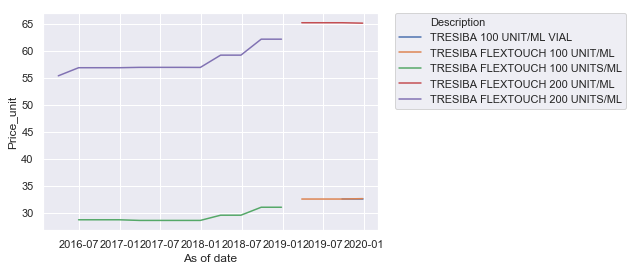

In [228]:

sns.lineplot(x = "As of date", y='Price_unit', 
                  hue="Description", 
                  data=df[df['Description'].str.contains('TRE', regex=True)], 
                  dashes = False
                 )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

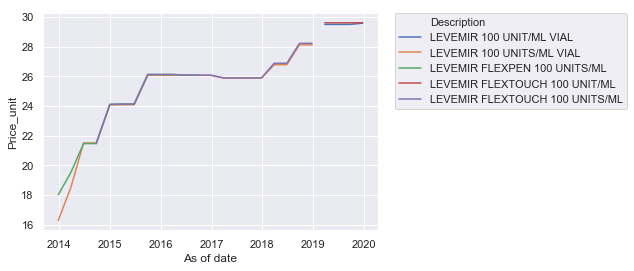

In [225]:
sns.lineplot(x = "As of date", y='Price_unit', 
                  hue="Description", 
                  data=df[df['Description'].str.contains('LEVE', regex=True)], 
                  dashes = False
                 )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

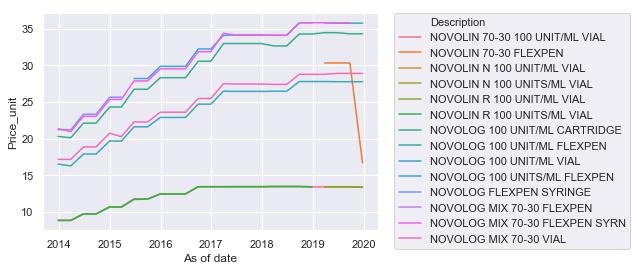

In [229]:
sns.lineplot(x = "As of date", y='Price_unit', 
                  hue="Description", 
                  data=df[df['Description'].str.contains('NOVO', regex=True)], 
                  dashes = False
                 )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)